In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
features = pd.read_csv("C:/titanic.csv", index_col = 0)

In [4]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
# 결측치 제거

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
features.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data = features.drop(columns = ['Survived', 'Name', 'Cabin', 'Age', 'Embarked'])

data

,Pclass,Sex,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,
1,3,male,1,0,A/5 21171,7.2500
2,1,female,1,0,PC 17599,71.2833
3,3,female,0,0,STON/O2. 3101282,7.9250
4,1,female,1,0,113803,53.1000
5,3,male,0,0,373450,8.0500
...,...,...,...,...,...,...
887,2,male,0,0,211536,13.0000
888,1,female,0,0,112053,30.0000
889,3,female,1,2,W./C. 6607,23.4500


In [9]:
data.isnull().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Ticket    0
Fare      0
dtype: int64

In [10]:
# Survived를 타겟 레이블로 삼아서 EDA 수행

In [11]:
label = features['Survived']

In [12]:
label

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [13]:
# 1. Pclass 레이블별 갯수 및 차트표시

<AxesSubplot:xlabel='Pclass', ylabel='count'>

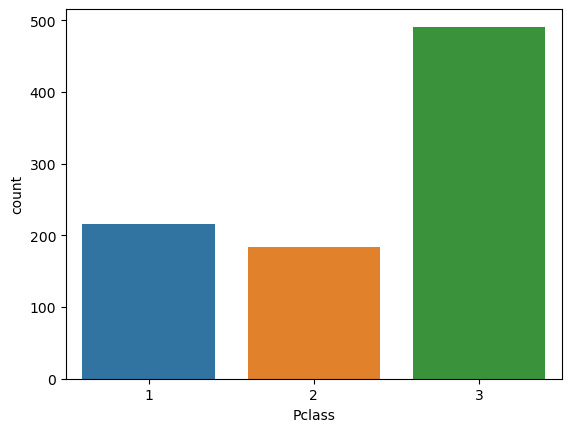

In [14]:
sns.countplot(data = data, x = "Pclass")

<AxesSubplot:ylabel='Pclass'>

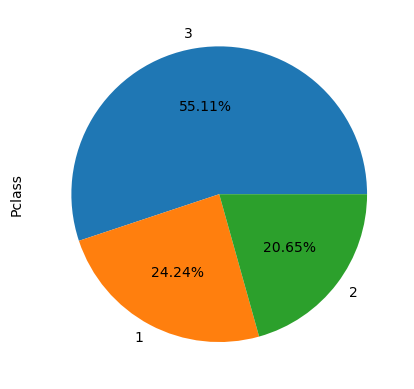

In [15]:
df = data.Pclass.value_counts()
df.plot.pie(autopct='%.2f%%')

In [16]:
titanic_size = data.pivot_table(
    index = "Pclass", columns = "Sex", aggfunc = "size")

titanic_size

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [17]:
# 2. 생존자와 사망자 총 숫자 및 차트표시

<AxesSubplot:xlabel='Survived', ylabel='count'>

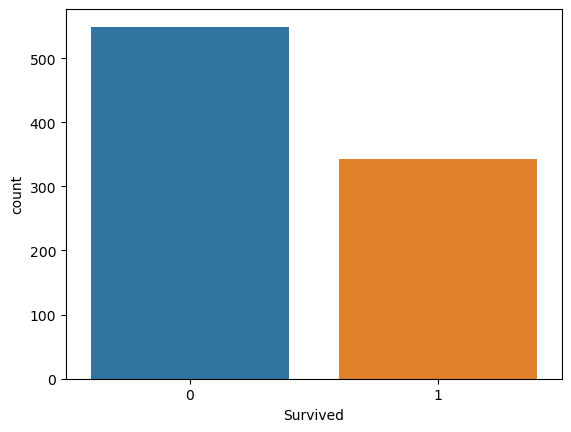

In [18]:
sns.countplot(data = data, x = label)

<AxesSubplot:ylabel='Survived'>

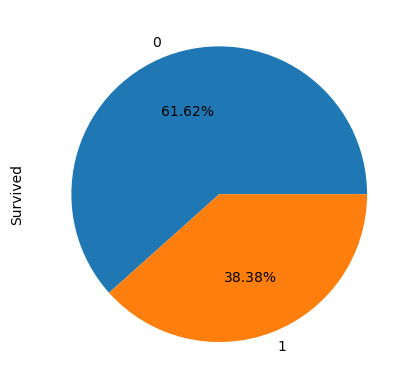

In [19]:
df = features.Survived.value_counts()
df.plot.pie(autopct='%.2f%%')

In [20]:
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석

In [21]:
print(features['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [22]:
print(features['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [23]:
print(features['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [24]:
features.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

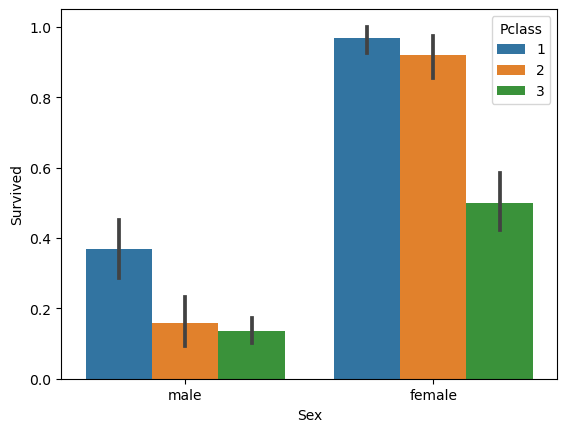

In [25]:
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = features)

In [26]:
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [30]:
data

,Pclass,Sex,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,
1,2,1,1,0,523,18
2,0,0,1,0,596,207
3,2,0,0,0,669,41
4,0,0,1,0,49,189
5,2,1,0,0,472,43
...,...,...,...,...,...,...
887,1,1,0,0,101,85
888,0,0,0,0,14,153
889,2,0,1,2,675,131


In [59]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = label

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [60]:
X

array([[  2,   1,   1,   0, 523,  18],
       [  0,   0,   1,   0, 596, 207],
       [  2,   0,   0,   0, 669,  41],
       ...,
       [  2,   0,   1,   2, 675, 131],
       [  0,   1,   0,   0,   8, 153],
       [  2,   1,   0,   0, 466,  30]], dtype=int64)

In [61]:
Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [65]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                70        
                                                                 
 dense_21 (Dense)            (None, 8)                 88        
                                                                 
 dense_22 (Dense)            (None, 6)                 54        
                                                                 
 dense_23 (Dense)            (None, 2)                 14        
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [66]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 3s 38ms/step - loss: 0.6919 - accuracy: 0.5927 - val_loss: 0.6481 - val_accuracy: 0.6145
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 0.6422 - accuracy: 0.6756 - val_loss: 0.6784 - val_accuracy: 0.6760
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.6647 - accuracy: 0.6081 - val_loss: 0.6167 - val_accuracy: 0.6983
Epoch 4/100
23/23 [==============================] - 0s 11ms/step - loss: 0.6533 - accuracy: 0.6390 - val_loss: 0.6192 - val_accuracy: 0.6816
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6243 - accuracy: 0.6770 - val_loss: 0.5938 - val_accuracy: 0.6648
Epoch 6/100
23/23 [==============================] - 0s 11ms/step - loss: 0.6547 - accuracy: 0.5955 - val_loss: 0.6159 - val_accuracy: 0.6145
Epoch 7/100
23/23 [==============================] - 0s 15ms/step - loss: 0.6390 - accuracy: 0.6629 - val_loss: 0.6328 - val_accuracy: 0.6145
Epoch 

23/23 [==============================] - 0s 10ms/step - loss: 0.6566 - accuracy: 0.6798 - val_loss: 0.6250 - val_accuracy: 0.6927
Epoch 59/100
23/23 [==============================] - 0s 11ms/step - loss: 0.6306 - accuracy: 0.6798 - val_loss: 0.6159 - val_accuracy: 0.6927
Epoch 60/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6529 - accuracy: 0.6798 - val_loss: 0.6159 - val_accuracy: 0.6927
Epoch 61/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6362 - accuracy: 0.6798 - val_loss: 0.6156 - val_accuracy: 0.6927
Epoch 62/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6343 - accuracy: 0.6798 - val_loss: 0.6173 - val_accuracy: 0.6927
Epoch 63/100
23/23 [==============================] - 0s 10ms/step - loss: 0.6351 - accuracy: 0.6798 - val_loss: 0.6163 - val_accuracy: 0.6927
Epoch 64/100
23/23 [==============================] - 0s 13ms/step - loss: 0.6452 - accuracy: 0.6798 - val_loss: 0.6268 - val_accuracy: 0.6927
Epoch 65/100


In [67]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       110
           1       0.72      0.33      0.46        69

    accuracy                           0.69       179
   macro avg       0.70      0.63      0.62       179
weighted avg       0.70      0.69      0.66       179

[[101   9]
 [ 46  23]]
